In [1]:
from sympy import *
init_printing()

In [2]:
#subscript 0 = star, 1 = planetesimal, 2 = planet
G,m0,O,f,g = symbols("G,m0,O,f,g")
Q0,Q1,Q2,P0,P1,P2 = symbols("Q0,Q1,Q2,P0,P1,P2")
x1,y1,x2,y2,px1,py1,px2,py2 = symbols("x1,y1,x2,y2,px1,py1,px2,py2")

In [3]:
#heliocentric, central star is at the origin (0,0)
m1 = O*O*f
m2 = O*g
mtot = (m0 + m1 + m2)

Q1 = sqrt(x1*x1 + y1*y1)
Q2 = sqrt(x2*x2 + y2*y2)
Q0 = (m1*Q1 + m2*Q2)/mtot

P0 = sqrt(px1*px1 + py1*py1) + sqrt(px2*px2 + py2*py2)
P1 = sqrt(px1*px1 + py1*py1) - m1*P0/mtot
P2 = sqrt(px2*px2 + py2*py2) - m2*P0/mtot

In [7]:
H_k = P1*P1/(2*m1) + P2*P2/(2*m2) - G*m1*m0/Q1 - G*m2*m0/Q2
H_s = (P1 + P2)**2/(2*m0)
H_i = -G*m1*m2/(Q2 - Q1)
H_B = H_s + H_i

In [19]:
D0 = diff(H_k,x1)*diff(H_B,px1) - diff(H_k,px1)*diff(H_B,x1) #first terms are 0
D1 = diff(H_k,y1)*diff(H_B,py1) - diff(H_k,py1)*diff(H_B,y1) 
D2 = diff(H_k,x2)*diff(H_B,px2) - diff(H_k,px2)*diff(H_B,x2) 
D3 = diff(H_k,y2)*diff(H_B,py2) - diff(H_k,py2)*diff(H_B,y2) 
D = D0+D1+D2+D3

B = 0.5*H_k + H_B
B0 = diff(D,x1)*diff(B,px1) - diff(D,px1)*diff(B,x1) #first terms are 0
B1 = diff(D,y1)*diff(B,py1) - diff(D,py1)*diff(B,y1) 
B2 = diff(D,x2)*diff(B,px2) - diff(D,px2)*diff(B,x2) 
B3 = diff(D,y2)*diff(B,py2) - diff(D,py2)*diff(B,y2)

result_raw = B0+B1+B2+B3

In [59]:
r0,r1,r2,v,vx1,vy1,vx2,vy2,H,a = symbols("r0,r1,r2,v,vx1,vy1,vx2,vy2,H,a")
result = result_raw.subs({sqrt(x1**2 + y1**2):r1,sqrt(x2**2 + y2**2):r2,sqrt(px1**2 + py1**2):m1*v,sqrt(px2**2 + py2**2):m2*v})
result = result.subs({-r1 + r2:H,r1:a-H,r2:a})
result = result.subs({O**2*f + O*g + m0:m0, O**2*f*v + O*g*v:O*g*v})

In [60]:
resulte = expand(result)

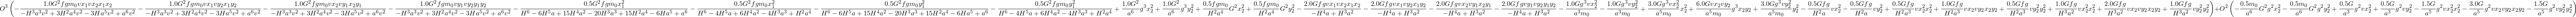

In [61]:
#assume order of magnitudes, i.e. x1 = y1 = r1
resulte = resulte.subs({px1:m1*vx1, py1:m1*vy1, px2:m2*vx2, py2:m2*vy2})

resulte = resulte.subs({O**13:0,O**11:0,O**10:0,O**9:0,O**8:0,O**7:0,O**6:0,O**5:0,O**4:0})
resulte = collect(resulte,O)
resulte

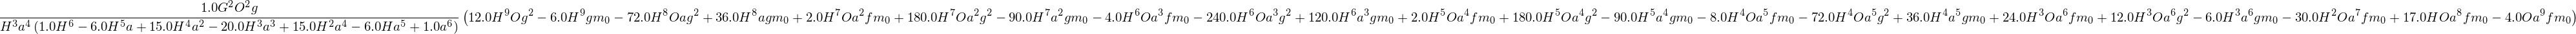

In [68]:
results = resulte

results = results.subs({x1:a-H, y1:a-H, x2:a, y2:a}) 
results = results.subs({vx1:v, vy1:v, vx2:v, vy2:v})
results = simplify(results.subs({v**2:G*m0/a, -H+a:a}))

results

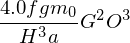

In [69]:
#take leading terms (H << a)
final = 1.0*G**2*O**2*g*4.0*O*a**9*f*m0/(H**3*a**10)
final